In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
flower_raw = cv.imread('flower.jpg')
flower_img = cv.cvtColor(flower_raw, cv.COLOR_BGR2RGB)

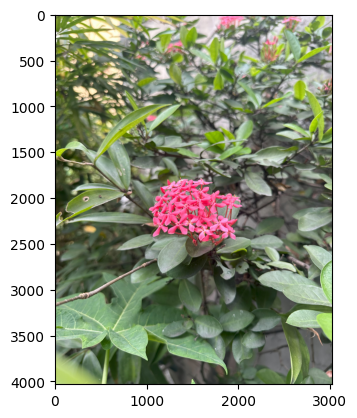

In [4]:
plt.imshow(flower_img)
# plt.axis('off')

## Splicing / Cropping

(-0.5, 1030.5, 1249.5, -0.5)

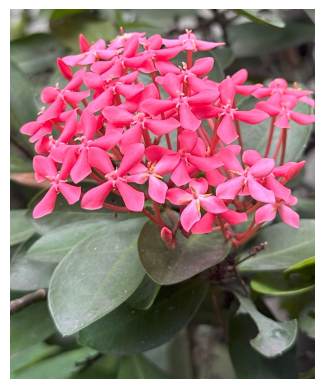

In [5]:
plt.imshow(flower_img[1720:2970,987:2018]) ##y1:y2, x1:x2
plt.axis('off')

In [6]:
# img = cv.cvtColor(flower_img[2050:2300,1125:1375], cv.COLOR_RGB2GRAY)
img = flower_img[2050:2300,1125:1375]

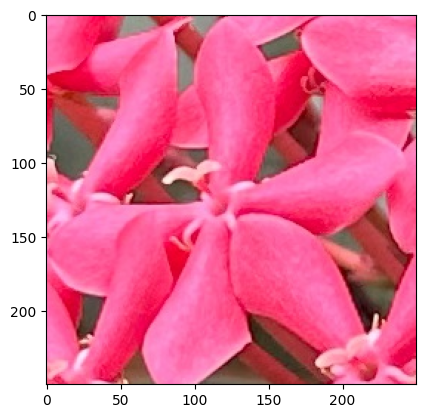

In [7]:
plt.imshow(img)

## Scaling

[Interpolation options](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html)

In [8]:
res_cubic = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
res_linear = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_LINEAR)
res_nearest = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_NEAREST)

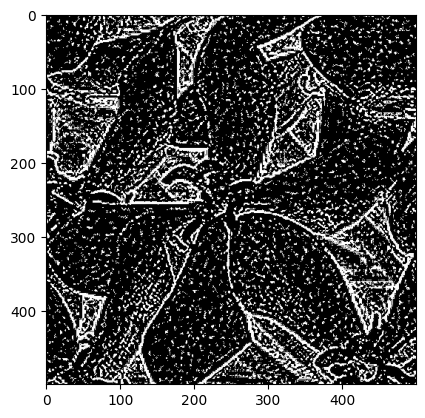

In [16]:
plt.imshow(np.abs(res_cubic[:,:,0]-res_linear[:,:,0]),cmap='gray')

In [ ]:
height, width = img.shape[:2]
res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)

## Translations

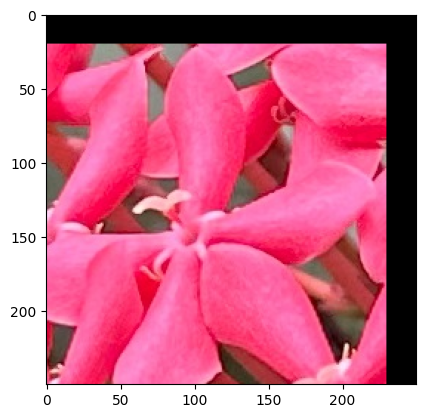

In [20]:
rows,cols, ch = img.shape
M = np.float32([[1,0,-20],[0,1,20]])
dst = cv.warpAffine(img,M,(cols,rows))
plt.imshow(dst)

## Rotation

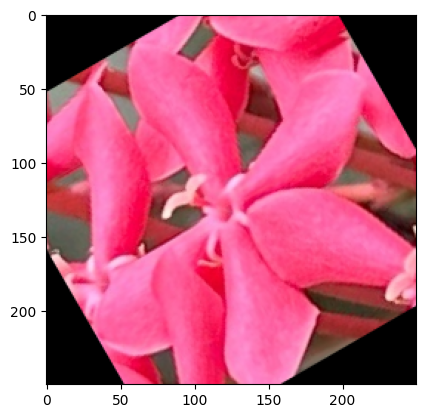

In [25]:
rows,cols, ch = img.shape
theta = 30
center = ((cols-1)/2.0,(rows-1)/2.0)
# center = ((cols-1)/4.0,(rows-1)/4.0)
scale = 1

M = cv.getRotationMatrix2D(center,theta,scale)
dst = cv.warpAffine(img,M,(cols,rows))
plt.imshow(dst)

## Affine Transformations (Warps)

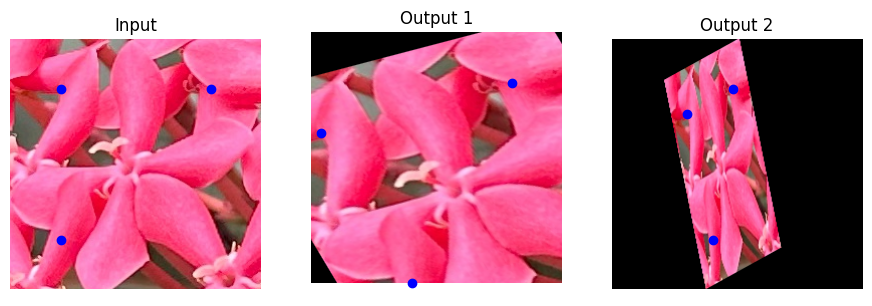

In [26]:
rows,cols, ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]]) ## reference points
pts2 = np.float32([[10,100],[200,50],[100,250]]) ## translated points
pts3 = np.float32([[75,75],[120,50],[100,200]]) ## translated points
M1 = cv.getAffineTransform(pts1,pts2)
M2 = cv.getAffineTransform(pts1,pts3)
dst1 = cv.warpAffine(img,M1,(cols,rows))
dst2 = cv.warpAffine(img,M2,(cols,rows))
plt.figure(figsize=(11,4))
plt.subplot(131),plt.imshow(img),plt.title('Input'), plt.scatter(pts1[:,0], pts1[:,1], color='blue'), plt.axis('off')
plt.subplot(132),plt.imshow(dst1),plt.title('Output 1'), plt.scatter(pts2[:,0], pts2[:,1], color='blue'), plt.axis('off')
plt.subplot(133),plt.imshow(dst2),plt.title('Output 2'), plt.scatter(pts3[:,0], pts3[:,1], color='blue'), plt.axis('off')

plt.show()